Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Liutauras Kuolis"
STUDENT_NUMBER = "s1060854"
COLLABORATOR_NAME = "Dinesh Kumar"
COLLABORATOR_STUDENT_NUMBER = "s1050577"

---

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) **named as follows**: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Roel] at `Roel.Bouman@ru.nl`
+ Do not add/remove any cells in the notebook, else this might break the auto-grading system. **An invalid notebook will mean a severe reduction in your grade!**
+ Only type your answers in those places where they are asked.
+ Remove any "raise NotImplementedError()" statements in the cells you answered.

# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.

## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing and preprocessing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `./data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

2.1.1a) (1.5pts)
> Load the data into Python using the `scipy.io.loadmat()` function. Save the numerical data, so the value associated with the key `X`, to a variable called `wine_data`.

**Helpful tips:**
 + *The object in wine.mat is a dictionary, see: https://www.w3schools.com/python/python_dictionaries.asp. The attributes are stored in matrix `X`. Attribute names and class names are stored in the `attributeNames` object, which contain arrays, of which the first element contains the names*


**Make sure to take a look at the documentation of functions before you try and use them!**


In [2]:
##Answer to question 2.1.1a
import scipy.io as sio
import numpy as np
mat_contents = sio.loadmat('./data/wine.mat')
 
wine_data = mat_contents['X']
wine_attributes = mat_contents['attributeNames']

# print(wine_data)
# print(wine_attributes)

# YOUR CODE HERE
# raise NotImplementedError()

In [3]:
"""Checks whether 2.1.1a output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

2.1.1b) (1.5pts)
> This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots. Add titles to each subplot so it's easy to see which attribute is depicted where. Make sure that each attribute is visualized on an applicable scale.

**Helpful tip:**
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can, and should, devise a for loop which fills up the subplot area!* 


**Make sure to take a look at the documentation of functions before you try and use them!**

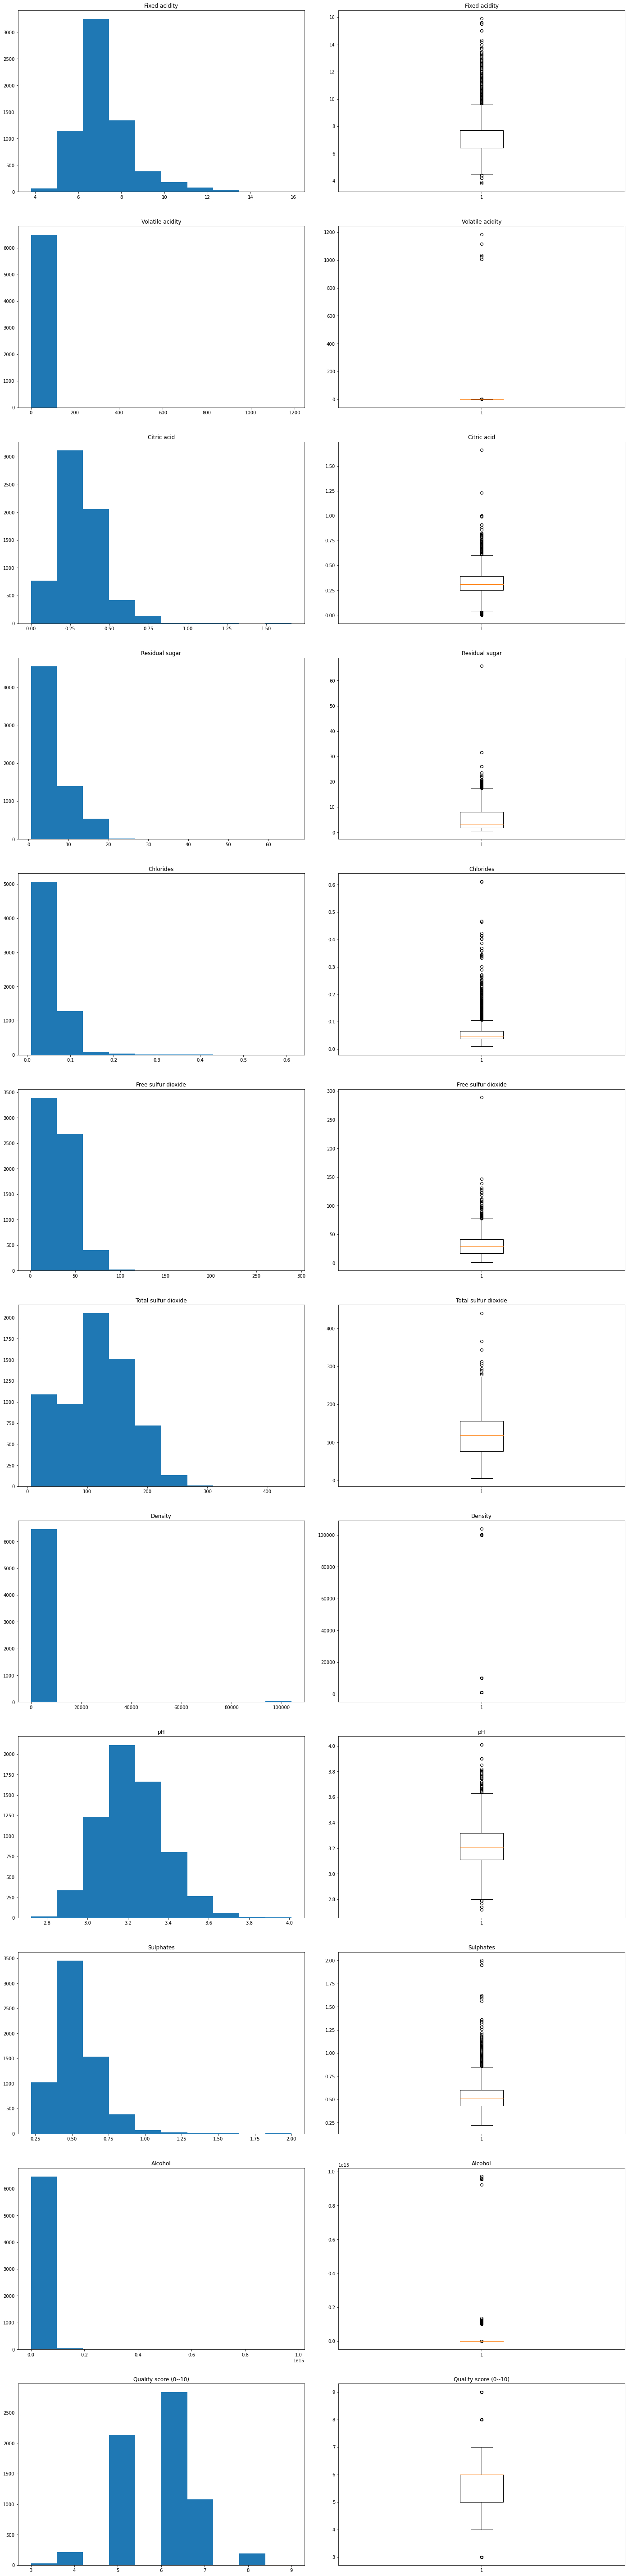

This figure shows the number of wine samples for each attribute attribute. Each different attribute is plotted on a separate row, with a histogram on the left showing the number of wine samples as the attribute value is changed, and a box plot on the right with each sample plotted according relative to median established in box plot to more clearly visualise the outliers.  


In [4]:
#Answer to question 2.1.1b
#Construct the plots here
import matplotlib.pyplot as plt
fig,ax = plt.subplots(12,2,figsize=(20,80)) # create 11 rows (for 11 attributes) of 2 columns of subplots(one for histogram and one for boxplot)
# ax = ax.flatten()
for i in range(0,12):
    ax[i][0].hist(wine_data[:,i]) # plot the gray values from the array in a histogram with 12 bins
    ax[i][0].set_title(mat_contents['attributeNames'][0][i][0])
    
    ax[i][1].boxplot(wine_data[:,i])
    ax[i][1].set_title(mat_contents['attributeNames'][0][i][0])

plt.tight_layout(pad=3.0)
plt.show()
print("This figure shows the number of wine samples for each attribute attribute. Each different attribute is plotted on a separate row, with a histogram on the left showing the number of wine samples as the attribute value is changed, and a box plot on the right with each sample plotted according relative to median established in box plot to more clearly visualise the outliers.  ")

# YOUR CODE HERE
# raise NotImplementedError()

From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. In the case of alcohol, we will **set the limit not to a factor 10, but to what is physically possible.** 

2.1.2a) (0.5pts)
> Identify outliers for volatile acidity, density, and alcohol percentage, all based on the criteria above, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!. Save the filtered data to `wine_data_filtered`. After filtering your data, standardize the data. Save your standardized and filtered data to `wine_data_filtered_standardized`.

**Helpful tips:**
 + *You can use logical indexing to easily make a new dataset, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *It is advisable to perform some sanity checks when removing parts of the data. Check for yourself how many samples are removed in each filtering step!*
 + *For standardization, use the StandardScaler included in the scikit-learn package, see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html. This is initially not the easiest way to standardize data, but it will save a lot of time in future experiments and your own project if you master the scikit-learn API!*

In [5]:
wine_data_filtered = wine_data
to_range = wine_data.shape[0]
row_number = 0

while(row_number < to_range):
    if (wine_data_filtered[row_number,1] > 20  or wine_data_filtered[row_number, 7] > 10 or wine_data_filtered[row_number, 10] > 100 or wine_data_filtered[row_number, 10] < 0):
        wine_data_filtered = np.delete(wine_data_filtered, (row_number), 0) #is deleting entire row!
    else:
        row_number += 1
        
    to_range = wine_data_filtered.shape[0]
        
# print(wine_data_filtered.shape[0])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(wine_data_filtered)

wine_data_filtered_standardized = scaler.transform(wine_data_filtered)


# YOUR CODE HERE
# raise NotImplementedError()

In [6]:
"""Checks whether 2.1.2a output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

2.1.2b) (1 pt)
> Plot new box plots and histograms for these three attributes with the outliers removed and compare them (side to side in a plot) with the corresponding attributes in the original, unfiltered, data.

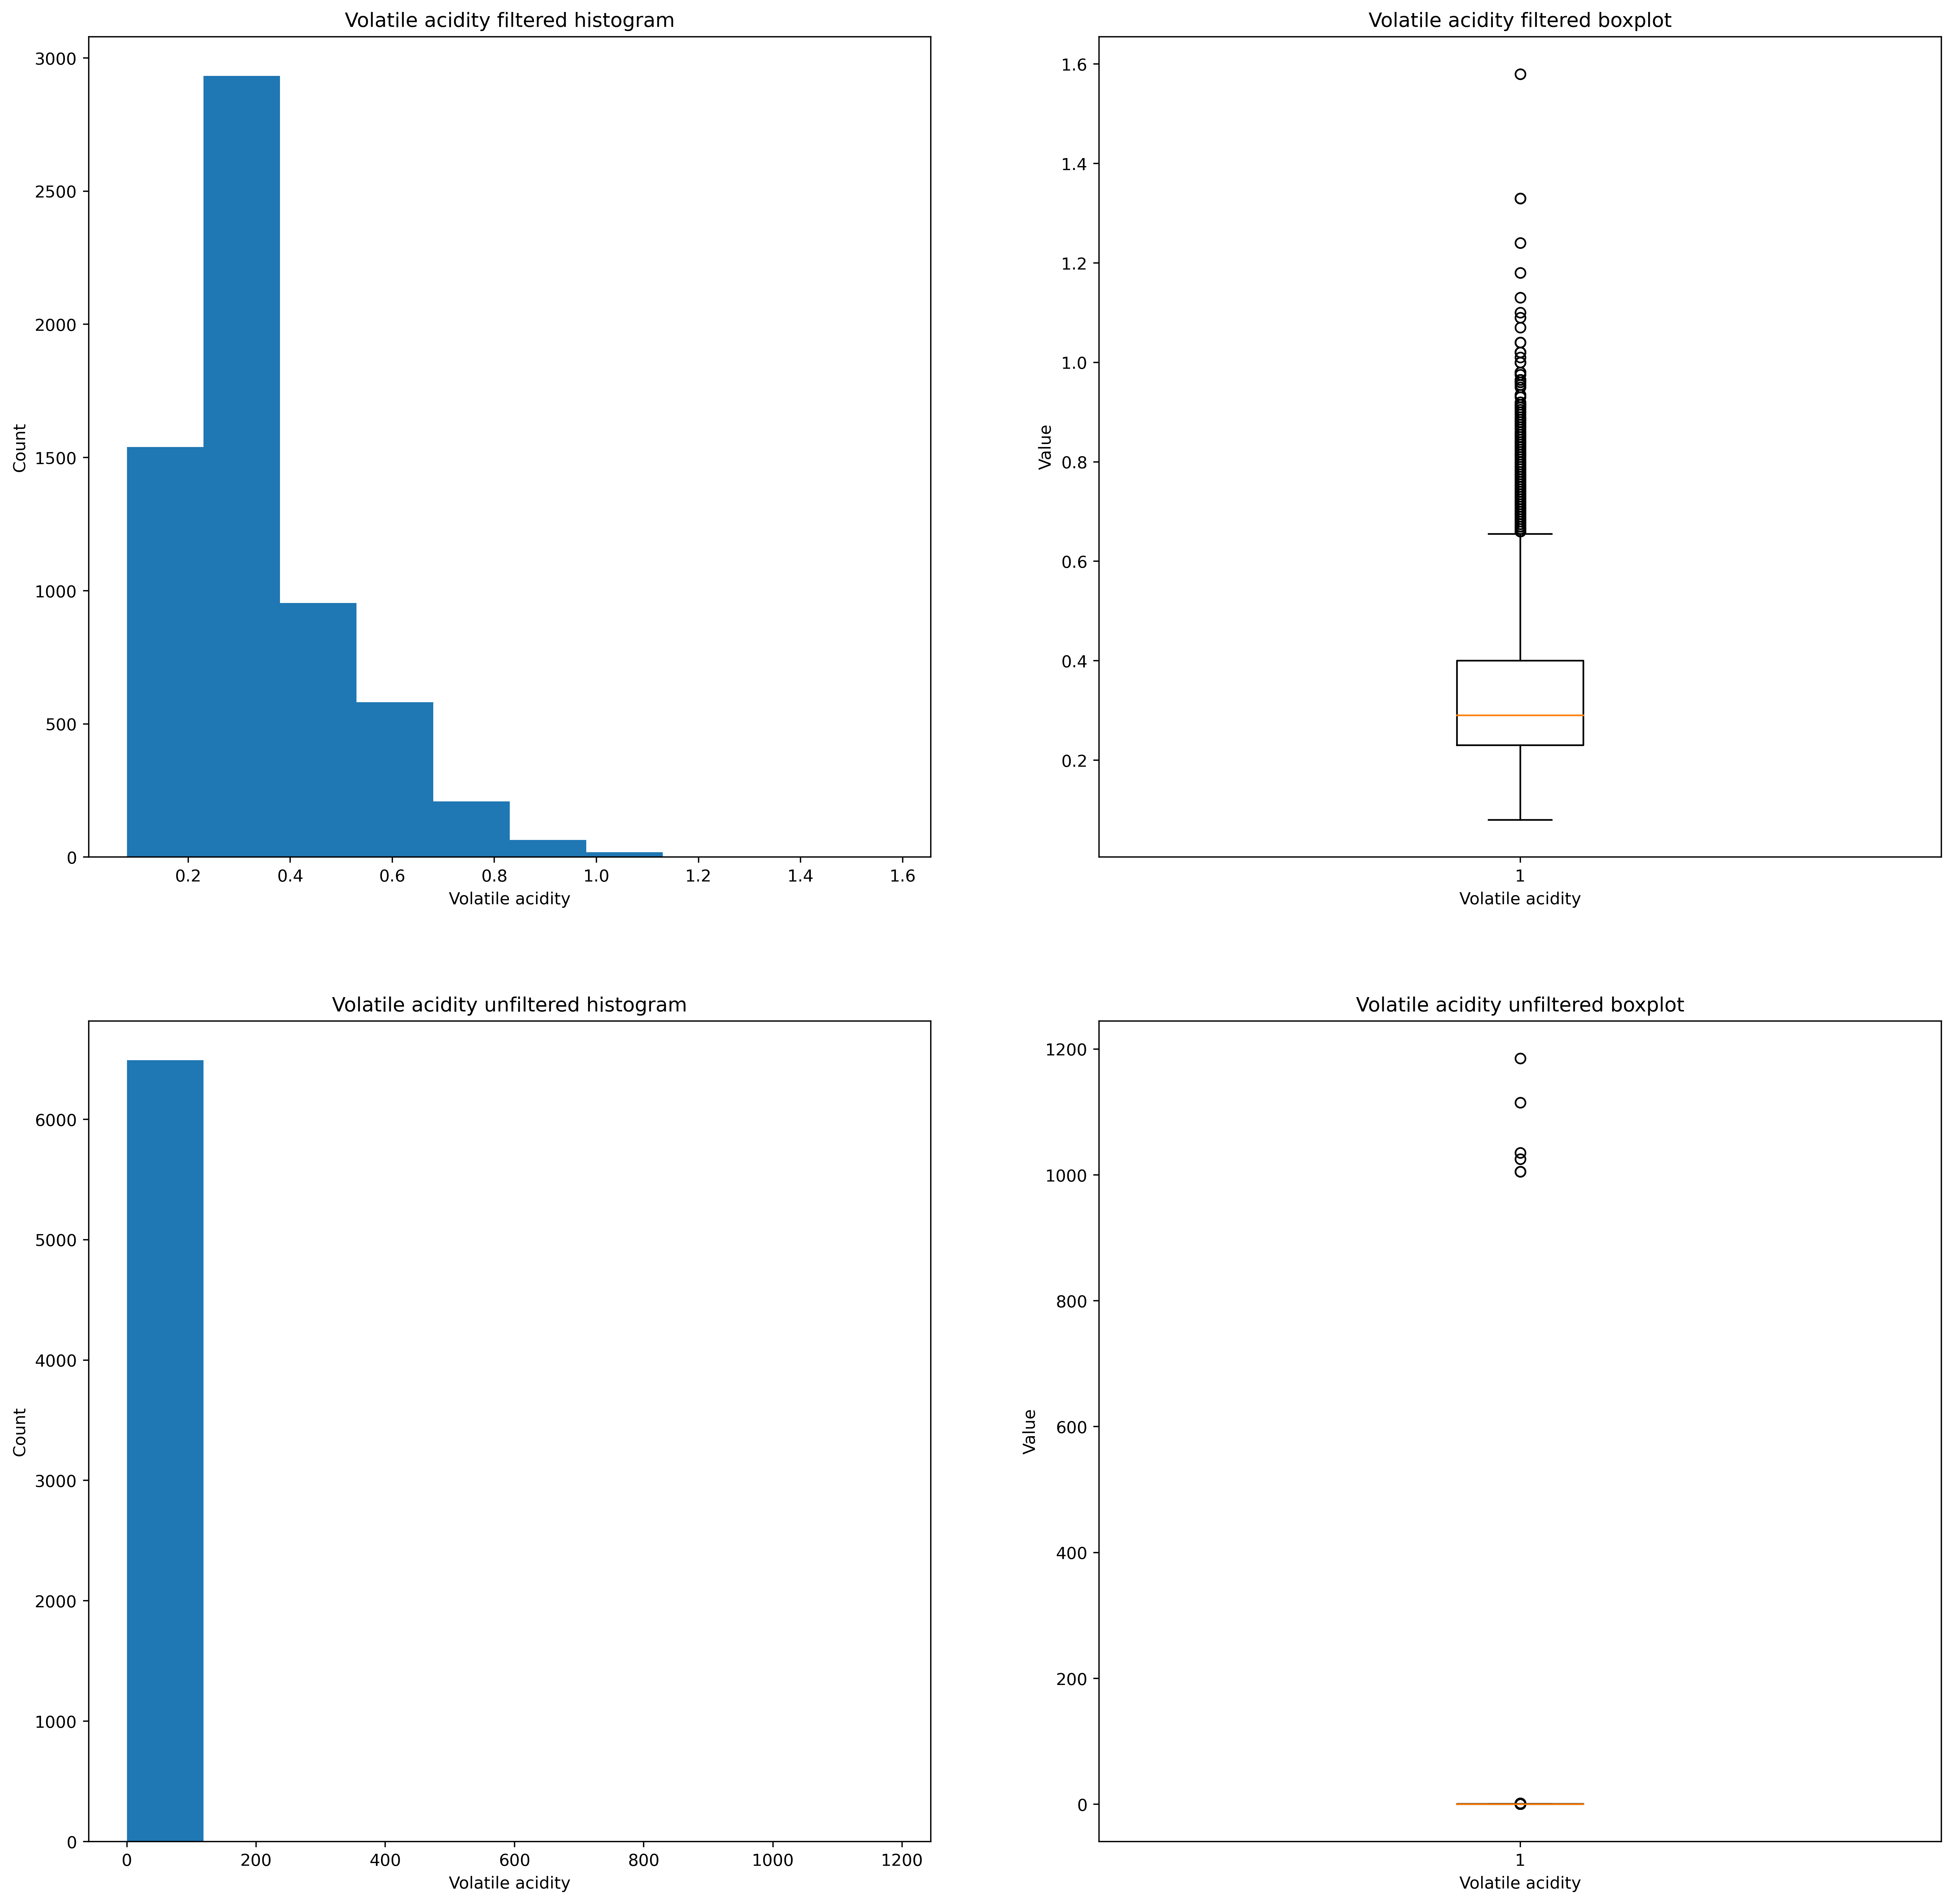

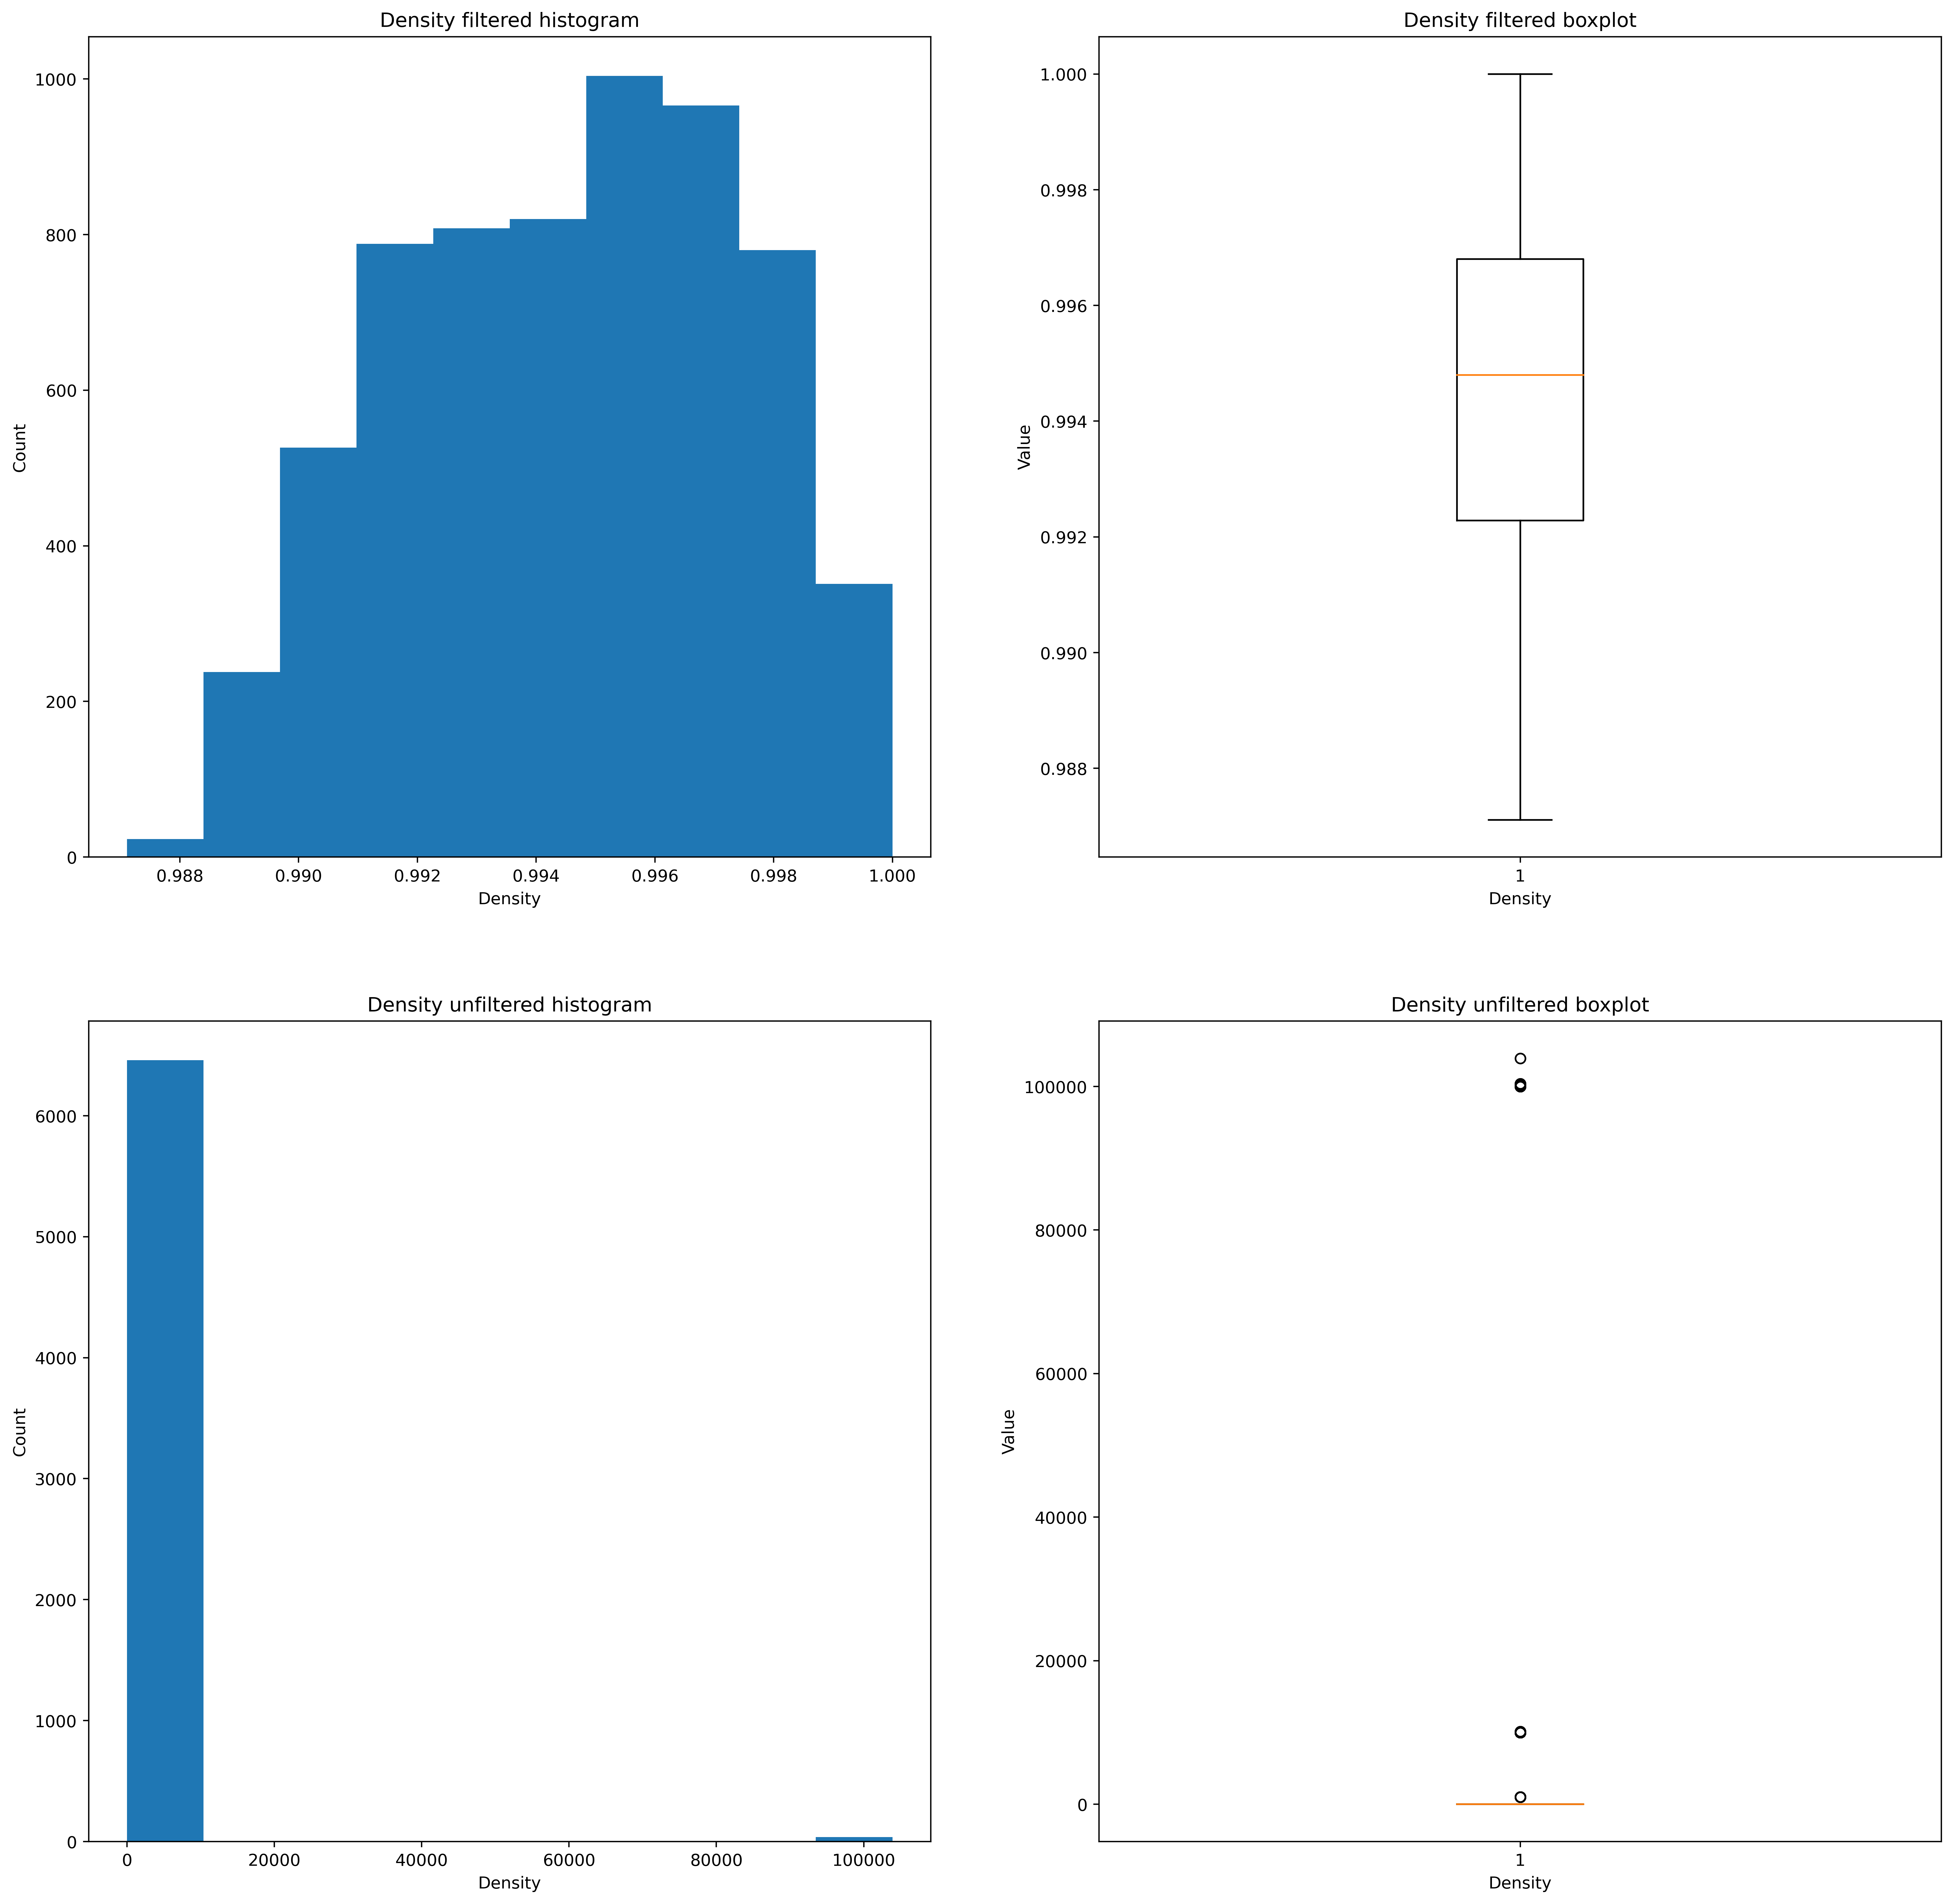

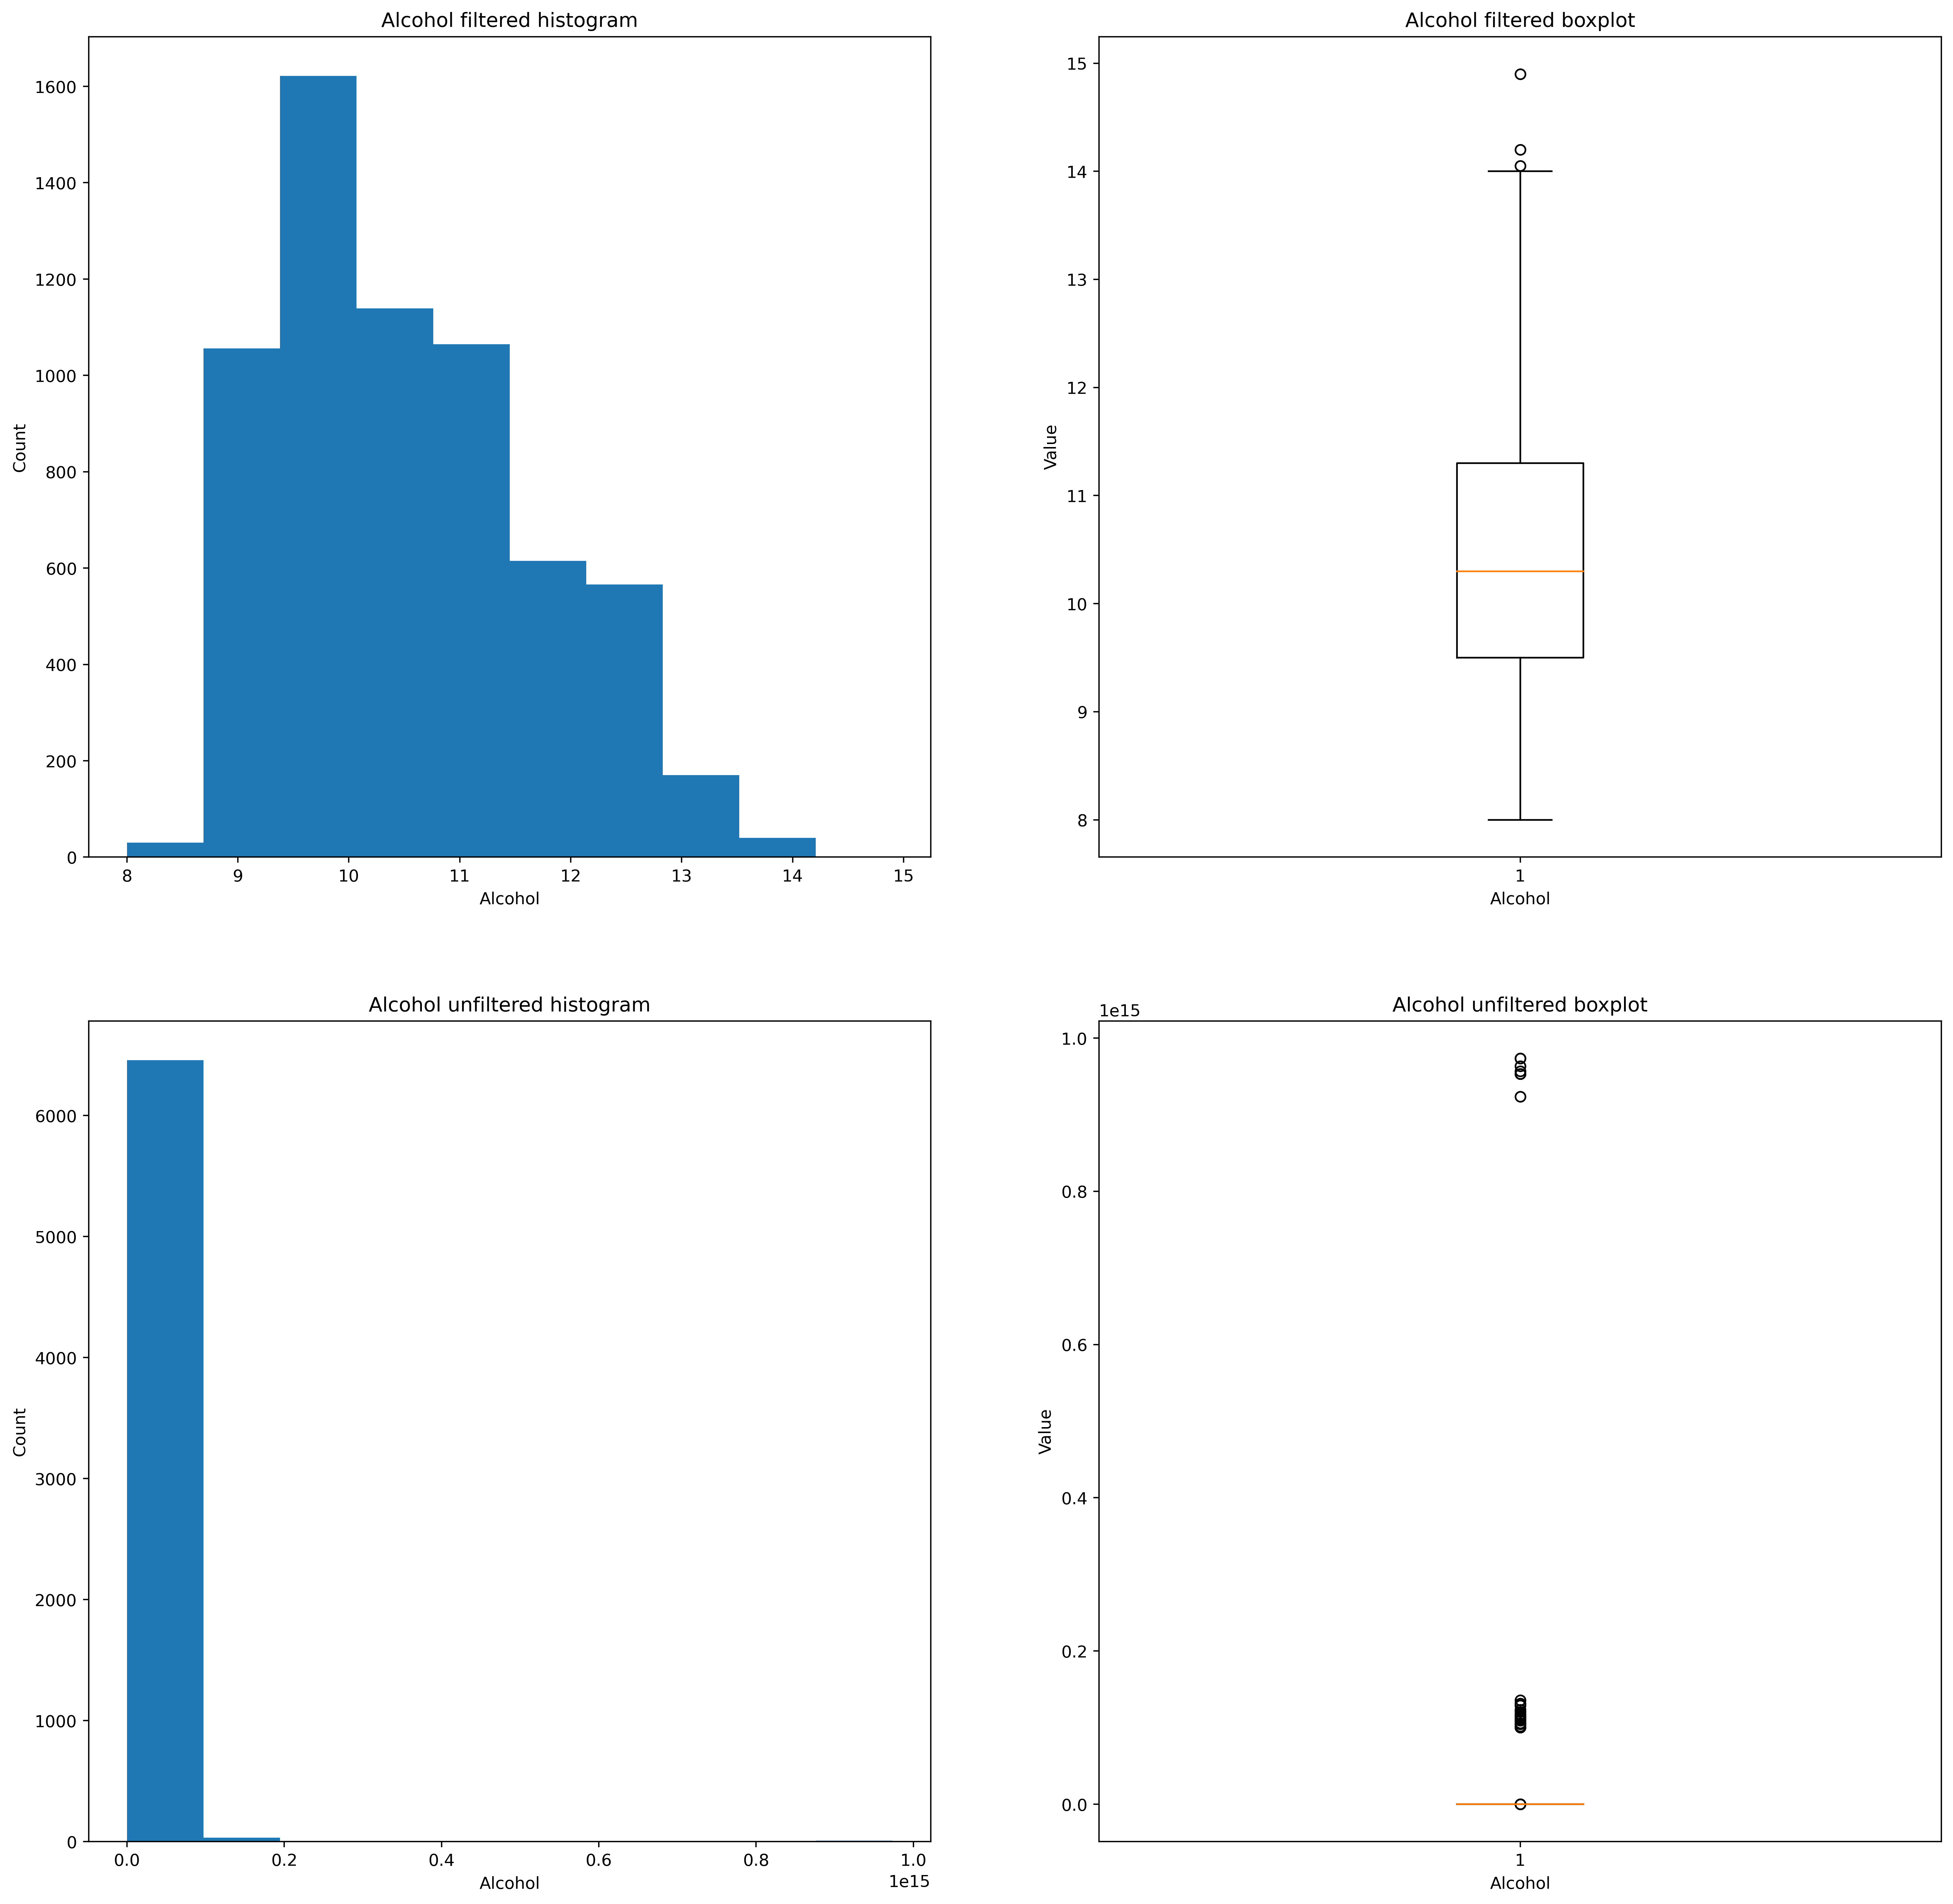

This figure shows the two different representations of volatile acidity, density and alcohol. On odd rows we have histogram and boxplot of filtered data with outliers removed and on even rows we have unfiltered histograms and boxplots


In [7]:
#Answer to question 2.1.2b
#Make your plots here:
#MY CODE
# fig,ax = plt.subplots(3,2,figsize=(20,30),dpi=400) # create 11 rows (for 11 attributes) of 2 columns of subplots(one for histogram and one for boxplot)
# # wine_data[:,0]
# # ax = ax.flatten()

# ax[0][0].hist(wine_data[:,1]) # plot the gray values from the array in a histogram with 12 bins
# ax[0][0].set_title(mat_contents['attributeNames'][0][1][0] + ' before filtering') #vol acid old 

# ax[0][1].hist(wine_data_filtered[:,1]) # plot the gray values from the array in a histogram with 12 bins
# ax[0][1].set_title(mat_contents['attributeNames'][0][1][0] + ' after filtering') # vol acid new

# ax[1][0].hist(wine_data[:,7]) # plot the gray values from the array in a histogram with 12 bins
# ax[1][0].set_title(mat_contents['attributeNames'][0][7][0] + ' before filtering') #density old 

# ax[1][1].hist(wine_data_filtered[:,7]) # plot the gray values from the array in a histogram with 12 bins
# ax[1][1].set_title(mat_contents['attributeNames'][0][7][0] + ' after filtering') # density new

# ax[2][0].hist(wine_data[:,10]) # plot the gray values from the array in a histogram with 12 bins
# ax[2][0].set_title(mat_contents['attributeNames'][0][10][0] + ' before filtering') #alcohol % old 

# ax[2][1].hist(wine_data_filtered[:,10]) # plot the gray values from the array in a histogram with 12 bins
# ax[2][1].set_title(mat_contents['attributeNames'][0][10][0] + ' after filtering') # alcohol % new

#Missing box plots!

# cumulative histogram with alpha
# plt.tight_layout(pad=3.0)
# plt.show()
# MY PARTNERS CODE HERE
def plotThis(i):
    wine_attribute = mat_contents['attributeNames'][0][i][0]
    fig, axs = plt.subplots(2, 2, figsize=(20,20), dpi=400)
    axs[0, 0].hist(wine_data_filtered[:,i])
    axs[0, 0].set_xlabel(wine_attribute)
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].set_title(str(wine_attribute) + " filtered histogram")
    axs[0, 1].boxplot(wine_data_filtered[:,i])
    axs[0, 1].set_ylabel('Value')
    axs[0, 1].set_xlabel(wine_attribute)
    axs[0, 1].set_title(str(wine_attribute) + " filtered boxplot")
    axs[1, 0].hist(wine_data[:,i])
    axs[1, 0].set_xlabel(wine_attribute)
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].set_title(str(wine_attribute) + " unfiltered histogram")
    axs[1, 1].boxplot(wine_data[:,i])
    axs[1, 1].set_ylabel('Value')
    axs[1, 1].set_xlabel(wine_attribute)
    axs[1, 1].set_title(str(wine_attribute) + " unfiltered boxplot")
    plt.show()
    
plotThis(1)
plotThis(7)
plotThis(10)

print('This figure shows the two different representations of volatile acidity, density and alcohol. On odd rows we have histogram and boxplot of filtered data with outliers removed and on even rows we have unfiltered histograms and boxplots')


2.1.3 (0.5pts)
> Why do we need to standardize the data after removing the outliers, as opposed to before removing the outliers? Give the -statistical- reason, not just the practical reason.

because the whole point of standardization is to scale the data, and if the very outliers used to determine the scale are removed later, then the data would no longer be to scale (so the centering would be off) and the standard deviations will have changed.

2.1.4 (1pt) 
> Make 11 scatter plots between all attributes and the wine quality as rated by human judges. 

> Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed. **Substantiate your answer with text.**

**Helpful hint:**
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

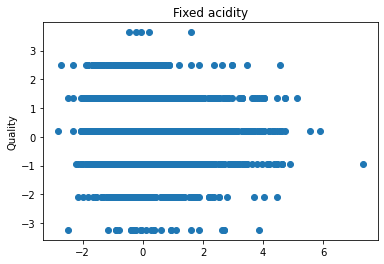

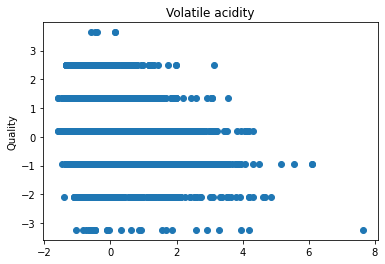

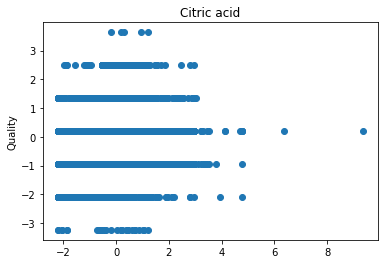

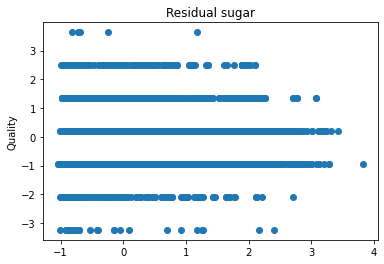

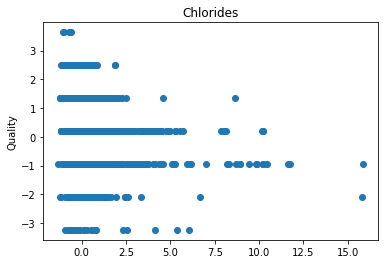

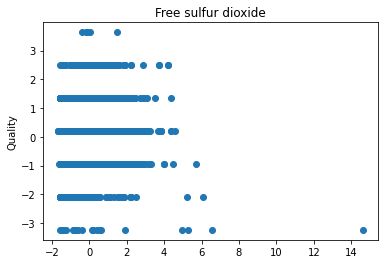

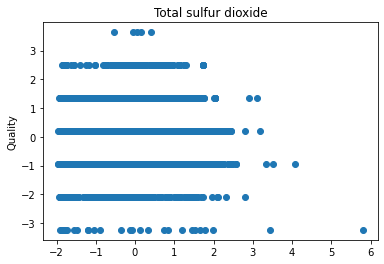

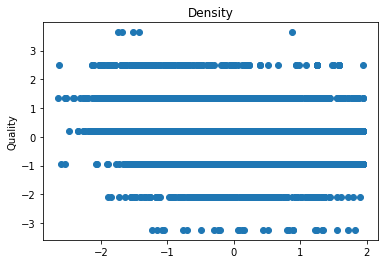

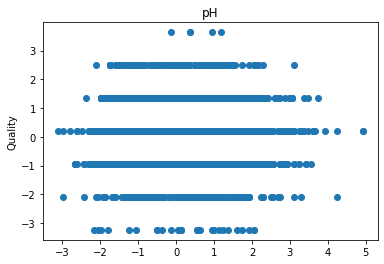

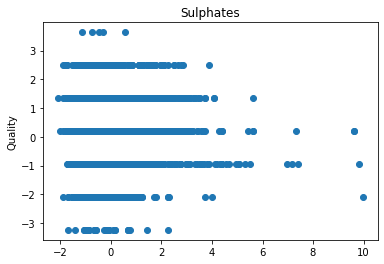

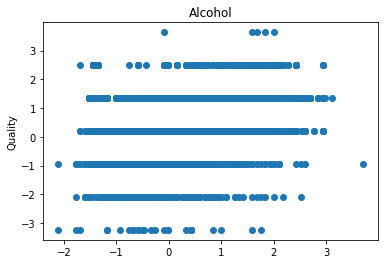

This figure has 11 rows and each row has the wine sample plotted according to its attribute value and its corresponding quality score 


<Figure size 432x288 with 0 Axes>

In [8]:
from scipy.stats import pearsonr
##Answer to question 2.1.4
# fig,ax = plt.subplots(11,1,figsize=(10,40),dpi=400) # create 11 rows (for 11 attributes) of 2 columns of subplots(one for histogram and one for boxplot)
# # wine_data[:,0]
# # ax = ax.flatten()
# for i in range(11):
#     txt = pearsonr(wine_data_filtered[:,i],wine_data_filtered[:,11]) 
#     print(mat_contents['attributeNames'][0][i][0] + '; pearsonr: '+ str(txt))
#     ax[i].scatter(wine_data_filtered[:,i],wine_data_filtered[:,11]) # plot the gray values from the array in a histogram with 12 bins
#     ax[i].set_title(mat_contents['attributeNames'][0][i][0]) #vol acid old 
#     ax[i].set_ylabel('Quality Score')
    

for i in range(11):
    plt.scatter(wine_data_filtered_standardized[:,i], wine_data_filtered_standardized[:,-1])
    plt.title(mat_contents['attributeNames'][0][i][0])
    plt.ylabel('Quality')
    plt.show()

    
print('This figure has 11 rows and each row has the wine sample plotted according to its attribute value and its corresponding quality score ')
#Missing box plots!

# cumulative histogram with alpha
plt.tight_layout(pad=3.0)
plt.show()
# YOUR CODE HERE
# raise NotImplementedError()

for some attributes, the lower quality scores occur more often as the value of the variable at the x-axis increase, for eg for volatile acidity, chlorides or density, however even though density seems to suggest this negative coorelation, the change in the x-axis is so insignificant that it doesn't seem generalisable.

as far as positive correlation is considered, this seems to be apparent in the graph for alcohol percentage (with the samples with a greater alcohol percentage being reported as being of higher quality with more higher scores). all these observations are supported by the pearson coefficient as well.

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

2.2.1 (0.5pts)
1. Load zipdata.mat by using the `loadmat` function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove the digits with the class index 2-9 from the data, so only digits belonging to the class 0 and 1 are analyzed. (remember logical indexing!) Save the data, with the other digits removed, to `X_01` and `y_01` respectively.

In [9]:
#Answer to question 2.2.1
zipdatamat_contents = sio.loadmat('./data/zipdata.mat')
# print(zipdatamat_contents)
#Import the data here

digit_data = zipdatamat_contents['traindata']


to_range = digit_data.shape[0]
row_number = 0
while(row_number < to_range):
    if (digit_data[row_number,0] >=2):
        digit_data = np.delete(digit_data, row_number, 0) #is deleting entire row!
        to_range = digit_data.shape[0]
    else:
        row_number += 1


X_01 = digit_data[:,1:] #data matrix
y_01 = digit_data[:,0] #class vector

# YOUR CODE HERE
# raise NotImplementedError()

In [10]:
"""Checks whether 2.2.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

PCA can be used for various things, one of which is compression. To show that we can reasonably reconstruct the digits from only fraction of the numerical information, we will compress the data to only the projection onto the first 4 Principal Components (instead of the 256 original variables).

2.2.2 (0.5pts)
1. Compute the principal components (PCA) of the data matrix `X_01`. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4. Save the matrix $Z$ with only 4 PCs to a variable called `Z`.
2. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$ and save it to a variable called `W`.


> **Hints:**
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z** $*$ **V**[:,:4]<sup>T</sup> + **μ**. Remember that **μ** is the mean we subtracted when mean-centering.

In [11]:
#Answer to question 2.2.1
Z = None
W = None

# u = np.array(X_01.mean(axis=0))

# Y = X_01 - u

# svds = np.linalg.svd(Y)

# Z = Y.dot(svds[2].transpose()[:,:4])
# W = Z.dot(svds[2][:,:4].transpose())+u

mu = X_01.mean(axis=0)

Y = X_01 - mu

SVDS = np.linalg.svd(Y)

V = SVDS[2].transpose()

Z = Y.dot(V[:,:4])


W = Z.dot(V[:,:4].transpose()) + mu


# YOUR CODE HERE
# raise NotImplementedError()

In [12]:
"""Checks whether 2.2.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

2.2.3 (1pts)
> Visualize the first 10 reconstructed digits (in `W`). Show them side to side with the first 10 digits in the original data (`X_01`). 

**Helpful hint:**
> You can take a look at the example code to see how you can visualize a certain digit.

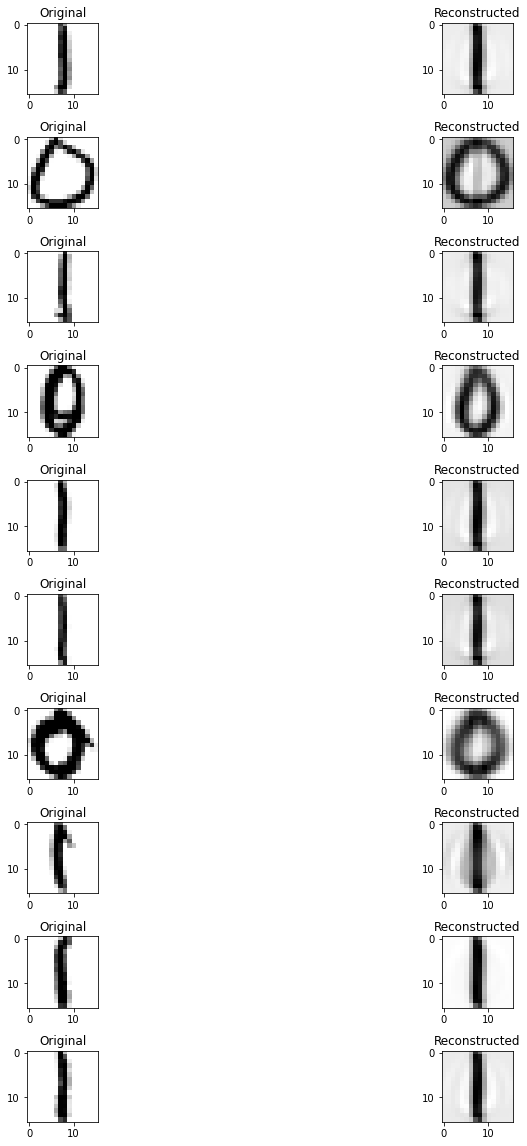

This figure shows ten samples of digits on each row that are either 0 or 1, with the original on the left and the same digit reconstructed using PCA on the right


In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape


# #my code


# Load Matlab data file to python dict structure

# mat_data = loadmat('data/zipdata.mat')



# # Extract variables of interest

# testdata = mat_data['testdata']

# X_test = testdata[:,1:]

# y_test = testdata[:,0]




# # Index of the digit to display
# i = 0

# # Load Matlab data file to python dict structure
# mat_data = loadmat('data/zipdata.mat')

# # Extract variables of interest
# testdata = mat_data['testdata']
# X_test = testdata[:,1:]
# y_test = testdata[:,0]
# for i in range(10):
# # Visualize the i'th digit as an image
#     plt.subplot(1,1,1);
#     I = reshape(W[i,:],(16,16))
#     plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
#     string = str(i) + ' Reconstructed'
#     plt.title(string);
#     plt.show()
#     plt.subplot(1,1,1);
#     I = reshape(X_01[i,:],(16,16))
#     plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
#     plt.title(i);
#     plt.show()


#partners code

# Index of the digit to display

i = 0



# Load Matlab data file to python dict structure

mat_data = loadmat('data/zipdata.mat')



# Extract variables of interest

testdata = mat_data['testdata']

X_test = testdata[:,1:]

y_test = testdata[:,0]



plt.figure(figsize=(16,16))

j = 1

for i in range(0, 10):

    I = reshape(X_01[i,:], (16,16))

    plt.subplot(10,2,j)

    plt.imshow(I, cmap=cm.gray_r)
    
    string = 'Original'
    plt.title(string);
    

    j = j + 1

    J = reshape(W[i,:], (16,16))

    plt.subplot(10, 2, j)

    plt.imshow(J, cmap=cm.gray_r)
    
    string = 'Reconstructed'
    plt.title(string);
    

    j = j + 1
    
plt.tight_layout(pad=1)
plt.show()
print("This figure shows ten samples of digits on each row that are either 0 or 1, with the original on the left and the same digit reconstructed using PCA on the right")

#Answer to question 2.2.3
#You can remove the example code for visualization if you want.

# YOUR CODE HERE
# raise NotImplementedError()

2.2.4 (1.5pts)
1. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
2. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes(0 and 1) in different colors. Add a legend to clarify which digit is shown in which color.


**Hints:**

+ *You can take a look at the example_figure.ipynb notebook (on Brightsapce) to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 
+ *Use Axes3D from Matplotlib to make 3D scatter plots. Make sure to read the documentation!*


C:\Users\themc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\themc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\themc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\themc\anacond

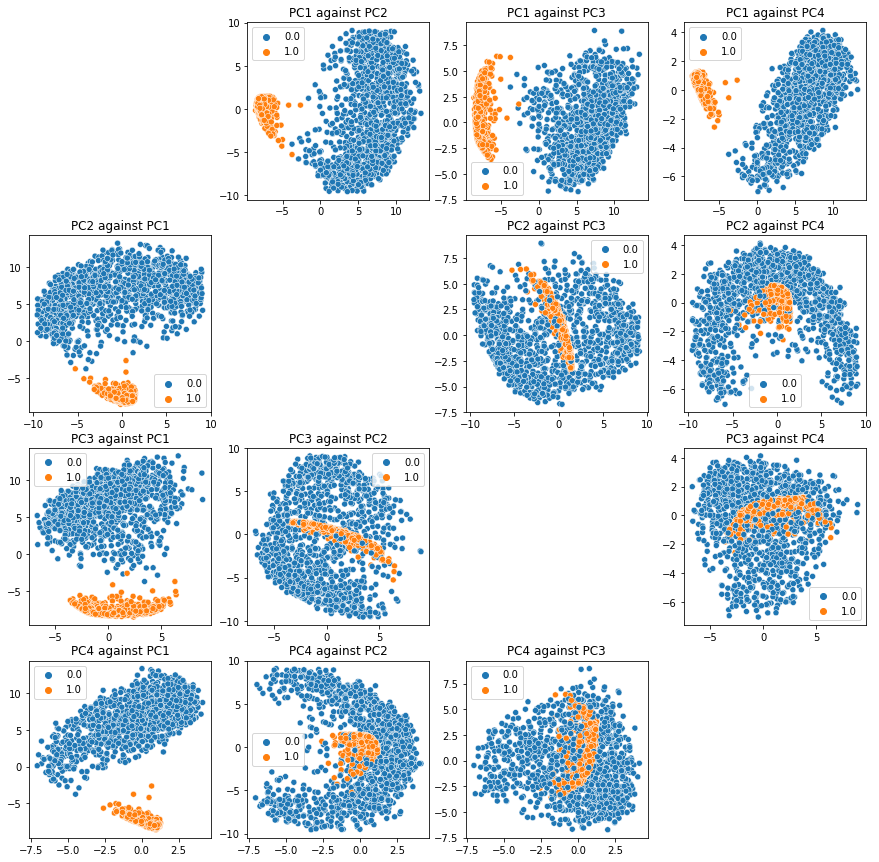

Figure 2: A scatterplot of variables A (on the X-axis) vs. B (on the Y-axis). Samples of class 0 are shown in blue, whilst samples of class 1 are shown in orange.


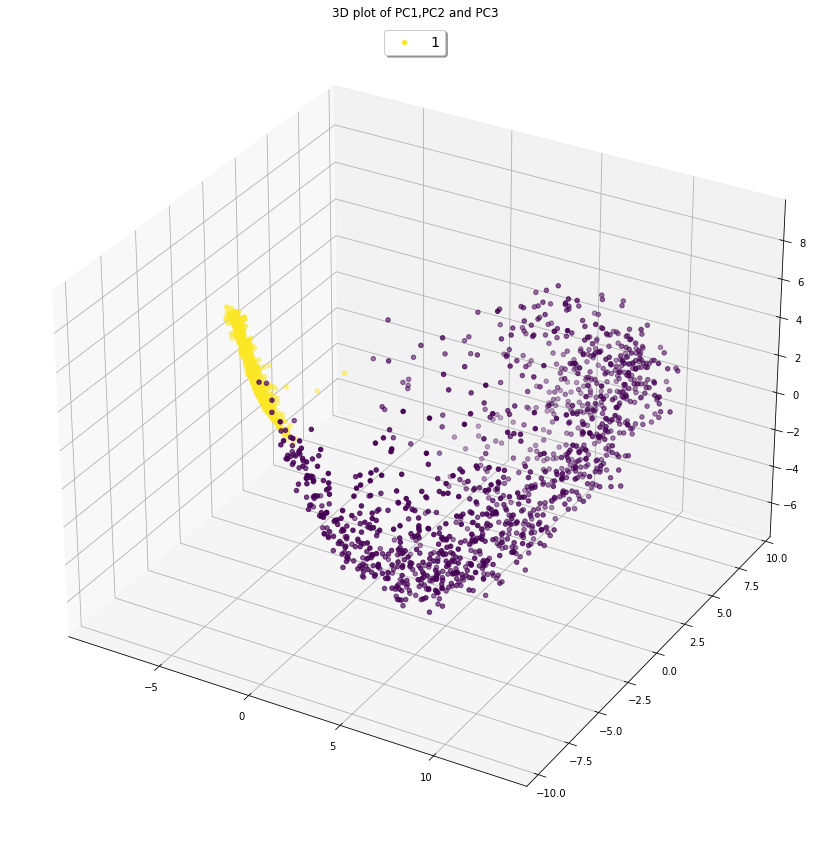

This 3D plot shows the scatter plot of principal components(PC) PC1, PC2 and PC3. The yellow highlight outlines the points that are associated with class 1


In [14]:
#Answer to question 2.2.4
# YOUR CODE HERE
# fig,ax = plt.subplots(4,4,figsize=(16,16)) # create 11 rows (for 11 attributes) of 2 columns of subplots(one for histogram and one for boxplot)
# for i in range(4):
#     for j in range(4):
#         if (i==j):
#             continue
#         else:
#             ax[i][j].scatter(Z[:,i],Z[:,j],label=f"PC{i} vs PC{j}")
# plt.legend()

# plt.show()

#partners code
import seaborn as sns

plt.figure(figsize=(15,15))
Zt = np.transpose(Z)
x = 1
for i in range(0, 4):
    for j in range(0 , 4):
        if (i != j):
            plt.subplot(4,4,x)
            sns.scatterplot(Zt[i], Zt[j], hue=y_01)
            plt.title("PC" + str(i+1) + " against PC" + str(j+1))
            x = x + 1
        else:

            x = x + 1
plt.show()
print('Figure 2: A scatterplot of variables A (on the X-axis) vs. B (on the Y-axis). Samples of class 0 are shown in blue, whilst samples of class 1 are shown in orange.')          
#3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Zt[0], Zt[1], Zt[2],c=y_01, label = '1')
ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.set_title('3D plot of PC1,PC2 and PC3')
plt.show()
print('This 3D plot shows the scatter plot of principal components(PC) PC1, PC2 and PC3. The yellow highlight outlines the points that are associated with class 1')


#my code


# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = Axes3D(fig)

# sequence_containing_x_vals = Z[:,0]
# sequence_containing_y_vals = Z[:,1]
# sequence_containing_z_vals = Z[:,2]

# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
# plt.show()

# raise NotImplementedError()

2.2.5 (0.5pts)
> Explain the differences between the original digits, and the reconstructed digits. What do you observe?

> What can you conclude from the various scatterplots about the PCs and the way they separate the two digits?

The reconstructed digits closely resemble the original, however with each class, theres some samples that have a grey background and a white outline of the opposite digit. The '0' reconstructed digits are also not as clear as that of '1' digits (probably because a round shape is relatively more complex to map), but they are visible enough to be able to easily differentiate between the digits.

The scatterplots show that relatively much less information is needed for '1' digits, and for PC1 the distinction between class 0 and class 1 is most distinct as the points are clearly apart in separate groups, however for PC2 and PC3, the points are not as distinctly separate, suggesting that PC1 is the line that best accounts for the shape. 

As for the 3D shape, the scatter plots were also quite good at being able to distinguish between the digits, but the 3D makes this even better.


## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.

A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>

2.3.1 (0.3pts) 
> Find the mean $m$ and the standard deviation $\sigma$ of this population. Assign them to the variables `m` and `sigma` respectively. Finally, print them.

**Helpful hint:**
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [15]:
##Answer to question 2.3.1 (0.3 points)
alien_list = [2,3,6,8,11,18]
alien_body_app_count = np.array(alien_list)


m = alien_body_app_count.mean()
sigma = alien_body_app_count.std()



# YOUR CODE HERE
# raise NotImplementedError()

In [16]:
"""Checks whether 2.3.1. output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

2.3.2 (0.3pts) 
> List (by printing) all possible samples of two aliens without replacement, and find the mean of each sample. Do the same with samples of four aliens. Assign the means to the variables `c2_means and` `c4_means` respectively. Make sure you save the result to a numpy array.

**Helpful hint:**
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [17]:
##Answer to question 2.3.2 (0.3 points)
c2_means = []
c4_means = []

from itertools import combinations

two_combination_list = list(combinations(alien_body_app_count,2))
sum_var = 0
for tup in two_combination_list:
    for num in tup:
        sum_var = sum_var + num
    c2_means.append(sum_var/2)
    sum_var = 0

# print(c2_means)
# print(two_combination_list)

four_combination_list = list(combinations(alien_body_app_count,4))
sum_var = 0
for tup in four_combination_list:
    for num in tup:
        sum_var = sum_var + num
    c4_means.append(sum_var/4)
    sum_var = 0

# print(four_combination_list)
c2_means = np.array(c2_means)
c4_means = np.array(c4_means)
# print(c2_means)

# print(c4_means)


# # YOUR CODE HERE
# raise NotImplementedError()

In [18]:
"""Checks whether 2.3.2. output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

> 2.3.3 (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard deviation of all the sample means (denoted by $\sigma_x$) for both the *N=2* and *N=4* samples. Assign them to variables called `m2`, `sigma2`, `m4`, and `sigma4`.


In [19]:
##Answer to question 2.3.3 (0.3 points)
import math

m2 = c2_means.mean()
ls = []

for i in c2_means:
    ls.append(pow(i-m2, 2))

sigma2 = math.sqrt(sum(ls) / c2_means.size) 
m4 = c4_means.mean()
ls = []

for i in c4_means:
    ls.append(pow(i-m4, 2))

sigma4 = math.sqrt(sum(ls) / c4_means.size)

print(m2)
print(sigma2)
print(m4)
print(sigma4)

8.0
3.40587727318528
8.0
1.70293863659264


In [20]:
"""Checks whether 2.3.3. output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

> 2.3.4 Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

i) The population mean is the same as both sample means. ii) $\sigma_x \approx \sigma/\sqrt{N}$ holds $\sigma/\sqrt{N} \approx$ 2.2 while our sample standard deviation is $\approx$ 3.4 and 1.7


> 2.3.5 (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

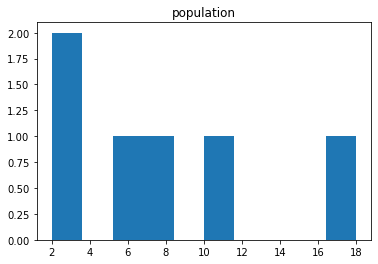

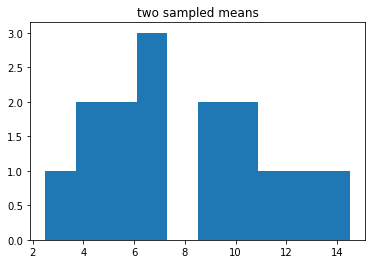

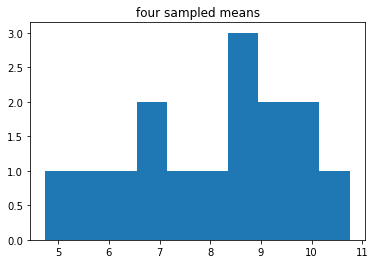

These histograms show first plainly the occurence of limb count in the alien population. The next two graphs show the same but instead consider samples in combinations of two and four and their respective means.) 


In [21]:
##Answer to question 2.3.5 

plt.hist(alien_body_app_count)
plt.title('population')
plt.show()

plt.hist(c2_means)
plt.title('two sampled means')
plt.show()

plt.hist(c4_means)
plt.title('four sampled means')
plt.show()

print('These histograms show first plainly the occurence of limb count in the alien population. The next two graphs show the same but instead consider samples in combinations of two and four and their respective means.) ')

the graphs start looking more and more like a bell shape as n increases.